<a href="https://colab.research.google.com/github/blessey15/Pytorch-Self-Projects/blob/main/MNIST_using_Pytorchipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MNIST Handwritten Image Recognintion using Pytorch**

In [1]:
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import torchvision.transforms as transforms
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [3]:
import torchvision.datasets as datasets
trainset=datasets.MNIST('PATH_TO_STORE_TRAINSET',download=True,train=True,transform=transform)
valset=datasets.MNIST('PATH_TO_STORE_TESTSET',download=True,train=True,transform=transform)

Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw




Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw
Processing...
Done!


In [4]:
train_loader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)
val_loader=torch.utils.data.DataLoader(valset,batch_size=64,shuffle=True)

In [5]:
data_iter=iter(train_loader)
images,label=data_iter.next()

In [6]:
print(images.shape)
print(label.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


label:  6
label:  0
label:  6
label:  7
label:  4


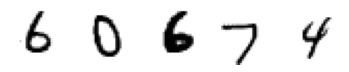

In [7]:
figure=plt.figure()
for i in range(1,6):
  plt.subplot(1,5,i)
  plt.axis('off')
  plt.imshow(images[i].numpy().squeeze(),cmap='gray_r')
  print("label: ",label[i].numpy().squeeze())

In [8]:
from torch import nn
input_size=784
hidden_size=[128,64]
output_size=10
model=nn.Sequential(nn.Linear(input_size,hidden_size[0]),
                    nn.ReLU(),
                    nn.Linear(hidden_size[0],hidden_size[1]),
                    nn.ReLU(),
                    nn.Linear(hidden_size[1],output_size),
                    nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [10]:
criterion = nn.NLLLoss()
images, labels = next(iter(train_loader))
images = images.view(images.shape[0], -1)

logps = model(images) #log probabilities
loss = criterion(logps, labels) #calculate the NLL loss

In [18]:
from time import time
from torch import optim
optimizer=optim.SGD(model.parameters(),lr=0.003,momentum=0.9)
time0=time()
epochs=10
for e in range(epochs):
  runningloss=0
  for images,labels in train_loader:
    images=images.view(images.shape[0],-1)
    optimizer.zero_grad()
    output=model(images)
    loss=criterion(output,labels)
    loss.backward()
    optimizer.step()
    runningloss+=loss.item()
  print("Epoch {} - Training loss: {}".format(e, runningloss/len(train_loader)))
print("\nTraining Time = ",(time()-time0))

Epoch 0 - Training loss: 2.3835611661105776
Epoch 1 - Training loss: 2.3018450071054226
Epoch 2 - Training loss: 2.301280854607442
Epoch 3 - Training loss: 2.3013481519369683
Epoch 4 - Training loss: 2.3013195663627024
Epoch 5 - Training loss: 2.301309978275665
Epoch 6 - Training loss: 2.301320030490981
Epoch 7 - Training loss: 2.3013068160522723
Epoch 8 - Training loss: 2.3013541347690736
Epoch 9 - Training loss: 2.301299492687559

Training Time =  109.27354264259338


In [19]:
(correct_count, all_count)=(0,0)
for images,labels in val_loader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 60000

Model Accuracy = 0.11236666666666667
